In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random
from sklearn.utils import shuffle

from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.feature_selection import SelectKBest  

from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
%matplotlib inline     

In [11]:
df = pd.read_csv("final_dataset.csv", encoding='CP949') # 데이터 로딩
df.head() 

,Unnamed: 0,0,1,2,3,4,계
0,0,2000.01,0.276143,0.144691,0.213827,0.197914,5.7
1,1,2000.02,0.276162,0.144701,0.213842,0.197927,5.7
2,2,2000.03,0.276168,0.144704,0.213846,0.197932,5.1
3,3,2000.04,0.276171,0.144706,0.213849,0.197934,4.5
4,4,2000.05,0.276173,0.144707,0.213850,0.197935,4.1


In [12]:
df = df.drop(["Unnamed: 0"], axis = 1 )
df.columns = ["시점","경제", "게임", "정치", "의료", "실업률"]

In [13]:
df = df.set_index('시점')

In [14]:
df

,경제,게임,정치,의료,실업률
시점,,,,,
2000.01,0.276143,0.144691,0.213827,0.197914,5.7
2000.02,0.276162,0.144701,0.213842,0.197927,5.7
2000.03,0.276168,0.144704,0.213846,0.197932,5.1
2000.04,0.276171,0.144706,0.213849,0.197934,4.5
2000.05,0.276173,0.144707,0.213850,0.197935,4.1
2000.06,0.276174,0.144707,0.213851,0.197936,3.9
2000.07,0.276175,0.144708,0.213852,0.197937,4.0
2000.08,0.276176,0.144708,0.213852,0.197937,4.1
2000.09,0.276176,0.144708,0.213853,0.197937,4.0


<function matplotlib.pyplot.show>

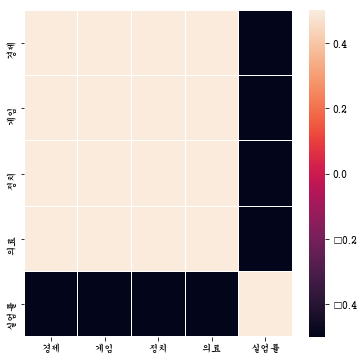

In [15]:
rc('font',family='HYGungSo-Bold')
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),linewidth=0.01, linecolor='white', vmax=0.5)
plt.show

In [16]:
array = df.values
array[:5]

array([[0.27614335, 0.14469109, 0.21382723, 0.19791388, 5.7       ],
       [0.27616182, 0.14470077, 0.21384153, 0.19792711, 5.7       ],
       [0.27616797, 0.14470399, 0.21384629, 0.19793153, 5.1       ],
       [0.27617105, 0.14470561, 0.21384867, 0.19793373, 4.5       ],
       [0.2761729 , 0.14470658, 0.2138501 , 0.19793506, 4.1       ]])

In [17]:
samples = shuffle(array)
samples[:5]

array([[0.27617618, 0.14470829, 0.21385265, 0.19793741, 3.2       ],
       [0.27617721, 0.14470883, 0.21385344, 0.19793814, 3.        ],
       [0.27616797, 0.14470399, 0.21384629, 0.19793153, 3.8       ],
       [0.27617105, 0.14470561, 0.21384867, 0.19793373, 3.7       ],
       [0.27617721, 0.14470883, 0.21385344, 0.19793814, 3.7       ]])

In [18]:
X = samples[:, :5]
y = samples[:, -1]

In [19]:
X_train, X_test,y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
print(len(X_train));print(len(X_test))

151
65


In [21]:
linreg = LinearRegression()
linreg.fit(X_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
linreg.intercept_ 

2.573496971081113e-12

In [24]:
linreg.coef_

array([-5.17724877e-08,  1.07498732e-07,  5.00342795e-08, -6.04239814e-08,
        1.00000000e+00])

In [25]:
y_pred = linreg.predict(X_test) 
y_pred

array([4.1, 3.1, 3.4, 2.7, 3.7, 3.3, 3.4, 3.3, 3.6, 3. , 3.8, 2.7, 3. ,
       3.2, 3.9, 3.5, 3.5, 3.4, 3.8, 3.7, 3.7, 3.1, 4.5, 3.6, 3.5, 3.6,
       3.5, 3.2, 3.2, 3.8, 3.8, 3.5, 3.2, 3. , 4.2, 3.8, 3.5, 3.9, 3.7,
       4.8, 3.6, 3.6, 3. , 3.2, 3.6, 3.4, 3.7, 3.2, 3.6, 4.1, 3.7, 4.1,
       3.2, 3.6, 3.7, 5.7, 3.1, 3.3, 4.3, 3.5, 2.8, 3.3, 3.4, 5.1, 3.6])

In [26]:
cv_scores = cross_val_score(linreg, X_train, y_train,
                           scoring = 'r2',  cv=10) 
print(cv_scores)
print("Average r2 score:", np.round(np.mean(cv_scores),2))
print("Standard deviation in r2 score:",\
     np.round(np.std(cv_scores),2))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average r2 score: 1.0
Standard deviation in r2 score: 0.0


In [31]:
residuals = y_test - y_pred
residuals[:10]

array([1.77635684e-15, 8.88178420e-16, 8.88178420e-16, 8.88178420e-16,
       1.33226763e-15, 8.88178420e-16, 4.44089210e-16, 8.88178420e-16,
       1.33226763e-15, 8.88178420e-16])

In [32]:
test_pred_df = pd.DataFrame(
{'actual': y_test,
'predicted' : np.round(y_pred,2),
'residual': y_test - y_pred})

test_pred_df.head()

,actual,predicted,residual
0,4.1,4.1,1.776357e-15
1,3.1,3.1,8.881784e-16
2,3.4,3.4,8.881784e-16
3,2.7,2.7,8.881784e-16
4,3.7,3.7,1.332268e-15


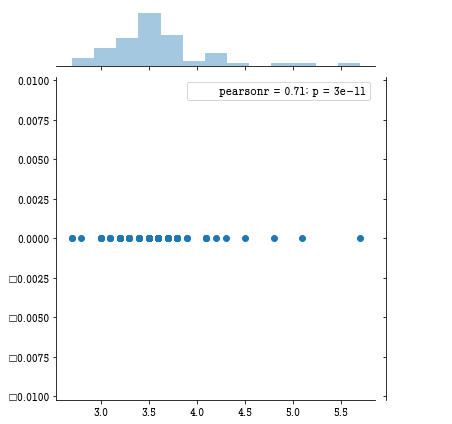

In [37]:
sn.jointplot(y_test, residuals, size=6)

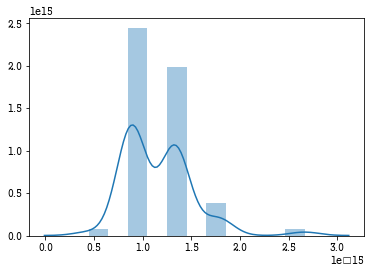

In [38]:
sn.distplot(residuals)

In [39]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
np.round(rmse,2)

0.0

In [40]:
metrics.r2_score(y_test,y_pred)

1.0

In [42]:
df

,경제,게임,정치,의료,실업률
시점,,,,,
2000.01,0.276143,0.144691,0.213827,0.197914,5.7
2000.02,0.276162,0.144701,0.213842,0.197927,5.7
2000.03,0.276168,0.144704,0.213846,0.197932,5.1
2000.04,0.276171,0.144706,0.213849,0.197934,4.5
2000.05,0.276173,0.144707,0.213850,0.197935,4.1
2000.06,0.276174,0.144707,0.213851,0.197936,3.9
2000.07,0.276175,0.144708,0.213852,0.197937,4.0
2000.08,0.276176,0.144708,0.213852,0.197937,4.1
2000.09,0.276176,0.144708,0.213853,0.197937,4.0


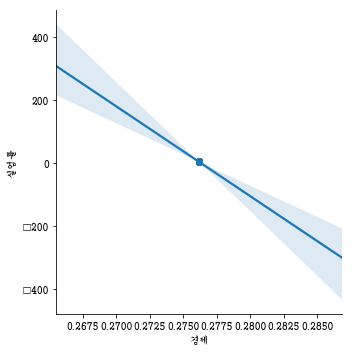

In [45]:
sns.lmplot(x="경제", y = "실업률", data=df)

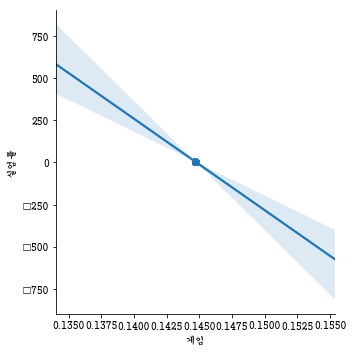

In [46]:
sns.lmplot(x="게임", y = "실업률", data=df)

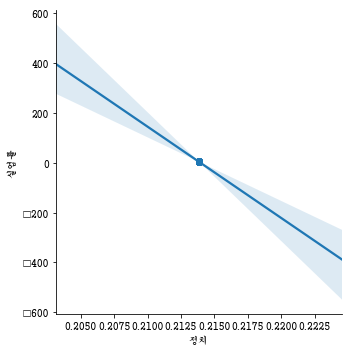

In [47]:
sns.lmplot(x="정치", y = "실업률", data=df)

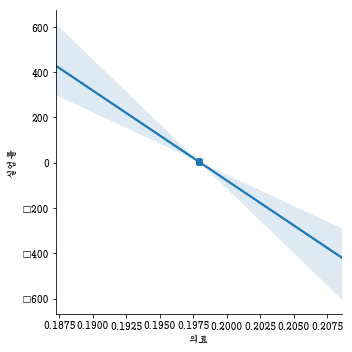

In [48]:
sns.lmplot(x="의료", y = "실업률", data=df)

In [49]:
X = df[["경제"]]
y = df[["실업률"]]
model = linear_model.LinearRegression()
results = model.fit(X,y)
results

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
results.coef_, results.intercept_

(array([[-28416.89965244]]), array([7851.47531796]))

In [52]:
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    실업률   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     9667.
Date:                Wed, 20 Jun 2018   Prob (F-statistic):          1.07e-180
Time:                        04:51:14   Log-Likelihood:                -169.68
No. Observations:                 216   AIC:                             341.4
Df Residuals:                     215   BIC:                             344.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
경제            12.8879      0.131     98.323      0.0